# Eyes in the Sky: Predicting Aircraft Damage Caused by Bird Strikes Using Machine Learning
## Part 1: Data Pre-Processing and Exploratory Data Analysis

Alan da Silveira Fleck
<br>
alansfleck@gmail.com
<br>
27/09/2021

# Introduction

A bird strike is defined as a collision between a bird and an aircraft during flight, take-off or landing roll. This term is often expanded to cover other wildlife strikes like bats or ground animals. According to the US Federal Aviation Administration (FAA), there have been about 227,000 wildlife strikes with civil aircraft in the US between 1990 and 2019, with an estimated direct cost as high as $500 million per year [1]. These costs, however, could be potentially higher when considering the resulted disruptions to airlines and airports, and especially, the risks that these strikes pose to people's safety.
<br>
<br>
Thus, this project aims to better understand the causes of wildlife strikes and predict damaging incidents based on the characteristics of the aircraft, birds, and flights. This notebook focuses on Part 1 of the project, namely the Data Pre-Processing and Exploratory Data Analysis (EDA).

---

# The Dataset

The data for this project was collected and maintained by the FAA Wildlife Strike Database [2]. The file used for this project was downloaded from data.world [3].

The dataset is composed of the following variables:
- `FlightDate`: Date of the strikes. Between 2000 and 2011.
- `Record ID`: Individual record number.
- `Aircraft: Type`: Airplane or Helicopter.
- `Airport: Name`: Name of the airports.
- `Altitude bin`: Binary columns: < 1000 ft and > 1000 ft.
- `Aircraft: Make/Model`: The models of the aircrafts involved in the strikes
- `Wildlife: Number struck`: Number of animals struck. Four categories (“1”, “2 to 10”, “11 to 100”, and “Over 100”).
- `Wildlife: Number Struck Actual`: Numeric column for the number of animals struck.
- `Effect: Impact to flight`: Five categories (“None”, “Precautionary Landing”, “Aborted Take-off”, “Other”, “Engine Shut Down”).
- `Effect: Indicated Damage`: "No Damage" or "Caused Damage". This is our target variable in this dataset.
- `Aircraft: Number of engines?`: The number of engines in the aircraft, from 1 to 4.
- `Aircraft: Airline/Operator`: Name of the airlines operating the aircrafts.
- `Origin State`: Name of the US States, Canadian provinces, and countries from international flights. 
- `When: Phase of flight`: When during the flight the strike occurred.  
- `Conditions: Precipitation`: The presence of rain, snow, or fog, as well as the combination of these conditions.
- `Remains of wildlife collected?`: If the remains of the animals were collected after the strike.
- `Remains of wildlife sent to Smithsonian`: If the remains of the animals were sent to the Smithsonian for analysis after the strike.
- `Remarks`: Comments from the investigators
- `Wildlife: Size`: Size of the animals involved in the strike. Small, medium, or large.
- `Conditions: Sky`: No clouds, clouds, or overcast. 
- `Wildlife: Species`: The species of the wildlife involved in the strike.
- `Pilot warned of birds or wildlife?`: Binary column indicating whether the pilot was warned of the presence of wildlife nearby.
- `Cost: Total  $`: Direct cost of damaging strikes.
- `Feet above ground`: The altitude where the strike occurred.
- `Number of people injured`: The number of people injured.
- `Is Aircraft Large?`: Indication of the size of the aircraft.

Let's import the relevant packages to be used in this notebook.

In [1]:
# Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
import datetime
import plotly.io as pio
import warnings

Now, let's read the data and take a first look at the dataset

In [2]:
# Reading the csv file into a data frame
df = pd.read_csv('data/bird_strikes.csv', encoding= 'unicode_escape', thousands=',')

# This will show all columns when calling df.head()
pd.set_option("display.max_columns", None)

# Checking the first 5 rows of the dataset
df.head()

Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight       FlightDate  \
0                             859         Engine Shut Down  2000-11-23 0:00   
1                             424                     None  2001-07-25 0:00   
2                             261                     None  2001-09-14 0:00   
3                             806    Precautionary Landing  2002-09-05 0:00   
4                             942                     None  2003-06-23 0:00   

  Effect: Indicated Damage Aircraft: Number of engines?  \
0            Caused damage                            2   
1            Caused damage                            2   
2                No damage                            2   
3                No damage                            2   
4                No damage                            2   

  Aircraft: Airline/Operator Origin State When: Phase of flight  \
0                US AIRWAYS*     New York                 Climb   
1          AMERICAN AIRLINES        Texas          Landing Roll   
2                   BUSINESS    Louisiana              Approach   
3            ALASKA AIRLINES   Washington                 Climb   
4            COMAIR AIRLINES     Virginia              Approach   

  Conditions: Precipitation  Remains of wildlife collected?  \
0                      None                           False   
1                      None                           False   
2                      None                           False   
3                      None                            True   
4                      None                           False   

   Remains of wildlife sent to Smithsonian  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

                                             Remarks Wildlife: Size  \
0  FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...         Medium   
1  102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...          Small   
2  FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...          Small   
3  NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...          Small   
4                                      NO DMG REPTD.          Small   

  Conditions: Sky      Wildlife: Species Pilot warned of birds or wildlife?  \
0        No Cloud  Unknown bird - medium                                  N   
1      Some Cloud            Rock pigeon                                  Y   
2        No Cloud      European starling                                  N   
3      Some Cloud      European starling                                  Y   
4        No Cloud      European starling                                  N   

   Cost: Total $  Feet above ground  Number of people injured  \
0          30736               1500                         0   
1              0                  0                         0   
2              0                 50                         0   
3              0                 50                         0   
4              0                 50                         0   

  Is Aircraft Large?  
0                Yes  
1                 No  
2           

In [3]:
# Shape of the data frame
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 25558 rows and 26 columns.


In [4]:
# Checking the period that this dataset covers
print(f"This dataset covers the period between {df['FlightDate'].min()} and {df['FlightDate'].max()}")

This dataset covers the period between 2000-01-02 0:00 and 2011-12-31 0:00


In [5]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25558 non-null  object
 3   Altitude bin                             25558 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25558 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25558 non-null  object
 8   FlightDate                               25558 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

The codes above show that this dataset has 25,558 unique observations of bird strikes between 2000 and 2011. It is also possible to see that some columns contain missing values (i.e. "Aircraft: Number of engines?", "Origin State" and "Remarks"). The data cleaning, including the imputation of missing values, is presented in the next section.

---

# Data Cleaning

### Duplicated Rows

As we can see from the code below, there is no repeated information in this dataset.

In [6]:
# Number of duplicated rows
duplicated_rows = df.duplicated().sum()
print(f"There are {duplicated_rows} duplicated rows")

There are 0 duplicated rows


### Missing Values

Next, let's check the columns with missing values.

In [7]:
# Number of missing values in each column
df.isna().sum(axis=0)

Record ID                                     0
Aircraft: Type                                0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                    0
Origin State                                449
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                       

In [8]:
# Percentage of missing values
df[["Aircraft: Number of engines?","Origin State", "Remarks"]].isna().sum(axis=0)/df.shape[0]*100

Aircraft: Number of engines?     1.044683
Origin State                     1.756788
Remarks                         18.667345
dtype: float64

The missing information for the columns `Aircraft: Number of engines?`, `Origin State`, and `Remarks` represent around 1%, 1.8%, and 18.6% of the total observations, respectively. The first two columns are inspected in the next sections to identify imputation strategy. Since the column `Remarks` will not be used in this project (please see the section "Feature Selection" for the explanation), no strategy for filling missing values will be used for this variable.

##### Aircraft: Number of engines?

By checking the different values in the column `Aircraft: Number of engines?`, we can see that there is a category called "C" with only one observation. The inspection of this row shows that this is an aircraft model RKWLTRBO 690. A search on Google tells us that this aircraft model has two engines. Thus, the value `C` was substituted by `2`.

In [9]:
# Check the different categories
df["Aircraft: Number of engines?"].value_counts()

2    23025
1     1313
3      564
4      388
C        1
Name: Aircraft: Number of engines?, dtype: int64

In [10]:
# Checking the row where the number of engines is "C"
engine_C = df[df["Aircraft: Number of engines?"] == "C"]
engine_C

Record ID Aircraft: Type              Airport: Name Altitude bin  \
6664     206990       Airplane  MORGANTOWN MUNICIPAL ARPT    > 1000 ft   

     Aircraft: Make/Model Wildlife: Number struck  \
6664         RKWLTRBO 690                       1   

      Wildlife: Number Struck Actual Effect: Impact to flight  \
6664                               1                     None   

           FlightDate Effect: Indicated Damage Aircraft: Number of engines?  \
6664  2001-11-05 0:00                No damage                            C   

     Aircraft: Airline/Operator   Origin State When: Phase of flight  \
6664                   BUSINESS  West Virginia               Descent   

     Conditions: Precipitation  Remains of wildlife collected?  \
6664                      None                           False   

      Remains of wildlife sent to Smithsonian  \
6664                                    False   

                                                Remarks Wildlife: Size  \
6664  PILOT ADZ NO DMG. INFO RELAYED TO CKB THRU MGW...         Medium   

     Conditions: Sky      Wildlife: Species  \
6664        No Cloud  Unknown bird - medium   

     Pilot warned of birds or wildlife?  Cost: Total $  Feet above ground  \
6664                                  N              0               4000   

      Number of people injured Is Aircraft Large?  
6664                         0                 No

In [11]:
# modify value in column from "C" to "2". 
# Note: Since this column is an object type. We will use the string "2" instead of the number 2
df["Aircraft: Number of engines?"].replace({"C": "2"}, inplace=True)

# Re-check the number of categories to see if the value was correctly changed
df["Aircraft: Number of engines?"].value_counts()

2    23026
1     1313
3      564
4      388
Name: Aircraft: Number of engines?, dtype: int64

The first step to input the missing values in the column `Aircraft: Number of engines?` is to verify if the information about the number of engines can be extracted from the column `Aircraft: Make/Model`. We can search on Google the number of engines of a sample of 5 aircraft models in order to check if any pattern exists:
- B-52H = 8 engines
- C-17A = 4 engines
- PA-31-350 = 2 engines
- F/A-18 = 2 engines
- EC-135 = 2 engines

Three out of the five models examined have 2 engines. This information, combined with the fact that the majority of the aircrafts in this dataset has 2 engines (i.e. 23,026), suggests that this is the best value to be filled in the missing observations.

In [12]:
# Selecting only the rows with missing values for Origin State
engines_null = df[df["Aircraft: Number of engines?"].isna() == True]

# Visualizing the Origin State and Airport:Name columns
engines_null[["Aircraft: Number of engines?", "Aircraft: Make/Model"]]

Aircraft: Number of engines? Aircraft: Make/Model
42                             NaN                B-52H
61                             NaN                B-52H
211                            NaN                B-52H
217                            NaN                C-17A
221                            NaN                B-52H
...                            ...                  ...
25184                          NaN            PA-31-350
25215                          NaN               F/A-18
25234                          NaN               EC-135
25474                          NaN                DA-40
25555                          NaN               EC-135

[267 rows x 2 columns]

In [13]:
# Imputing the string "2" to the missing values of the number of engines
df['Aircraft: Number of engines?'] = df['Aircraft: Number of engines?'].fillna("2")

# Re-check the number of categories to see if the values were correctly filled
df["Aircraft: Number of engines?"].value_counts()

2    23293
1     1313
3      564
4      388
Name: Aircraft: Number of engines?, dtype: int64

In [14]:
# Sanity check
print(f"There are {df['Aircraft: Number of engines?'].isna().sum(axis=0)} missing values for the columns 'Aircraft: Number of engines?'")

There are 0 missing values for the columns 'Aircraft: Number of engines?'


The missing values for 'Aircraft: Number of engines?' were identified and filled. The next section investigates the column `Origin State`.

##### Origin State

Regarding `Origin State`, the code below shows that the `NaN` values are related to flights that originated outside the US. Thus, these missing values were filled as "International".

In [15]:
# Selecting only the rows with missing values for Origin State
state_null = df[df["Origin State"].isna() == True]

# Visualizing the Origin State and Airport:Name columns
state_null[["Origin State", "Airport: Name"]]

Origin State        Airport: Name
5              NaN  GUAYAQUIL/S BOLIVAR
33             NaN          TAHITI FAAA
66             NaN    CAPITAL (BEIJING)
98             NaN            SUVA FIJI
176            NaN         TOCUMEN INTL
...            ...                  ...
25376          NaN    MANAGUA INTL ARPT
25407          NaN  GUADALAJARA, MEXICO
25431          NaN   MINISTRO PISTARINI
25488          NaN     PRINCESS JULIANA
25499          NaN        BOMBAY/MUMBAI

[449 rows x 2 columns]

In [16]:
# Imputing the string "International" to the missing values of Origin State
df['Origin State'] = df['Origin State'].fillna("International")

# Looking at index 5, it seems that the missing values were correctly filled
df['Origin State'].head(6)

0         New York
1            Texas
2        Louisiana
3       Washington
4         Virginia
5    International
Name: Origin State, dtype: object

In [17]:
# Sanity check
print(f"There are {df['Origin State'].isna().sum(axis=0)} missing values for the column 'Origin State'")

There are 0 missing values for the column 'Origin State'


### Splitting Columns

Moving on to `Wildlife: Species`, we can see that this column stores two types of information: The name of the species and its size. Since the information of the size is already represented in the column `Wildlife: Size`, only the name of the species will be retained in this column.

In [18]:
# Checking the first 6 rows of the column "Wildlife: Species"
df['Wildlife: Species'].head(6)

0    Unknown bird - medium
1              Rock pigeon
2        European starling
3        European starling
4        European starling
5     Unknown bird - small
Name: Wildlife: Species, dtype: object

In [19]:
# Spliting size from species name from column "Wildlife: Species"
new = df["Wildlife: Species"].str.split(" - ", expand = True)
df["Wildlife: Species"] = new[0]
df.head(3)

Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight       FlightDate  \
0                             859         Engine Shut Down  2000-11-23 0:00   
1                             424                     None  2001-07-25 0:00   
2                             261                     None  2001-09-14 0:00   

  Effect: Indicated Damage Aircraft: Number of engines?  \
0            Caused damage                            2   
1            Caused damage                            2   
2                No damage                            2   

  Aircraft: Airline/Operator Origin State When: Phase of flight  \
0                US AIRWAYS*     New York                 Climb   
1          AMERICAN AIRLINES        Texas          Landing Roll   
2                   BUSINESS    Louisiana              Approach   

  Conditions: Precipitation  Remains of wildlife collected?  \
0                      None                           False   
1                      None                           False   
2                      None                           False   

   Remains of wildlife sent to Smithsonian  \
0                                    False   
1                                    False   
2                                    False   

                                             Remarks Wildlife: Size  \
0  FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...         Medium   
1  102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...          Small   
2  FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...          Small   

  Conditions: Sky  Wildlife: Species Pilot warned of birds or wildlife?  \
0        No Cloud       Unknown bird                                  N   
1      Some Cloud        Rock pigeon                                  Y   
2        No Cloud  European starling                                  N   

   Cost: Total $  Feet above ground  Number of people injured  \
0          30736               1500                         0   
1              0                  0                         0   
2              0                 50                         0   

  Is Aircraft Large?  
0                Yes  
1                 No  
2                 No

### Formatting the Date and Creating "Year", "Month", and "Weekday" columns

The code below creates the columns `Year`, `Month, and `Weekday` from `FlightDate`.

In [20]:
# Converting the "FlightDate" column to datetime format
df["FlightDate"] =  pd.to_datetime(df["FlightDate"])

# Creating the column Year
df["Year"] = df["FlightDate"].dt.strftime("%Y")

# Creating the Month column
df["Month"] = df["FlightDate"].dt.strftime("%m")

# Creating the Weekday column. From 0 to 6. 0 is Sunday.
df["Weekday"] = df["FlightDate"].dt.strftime("%w")


# Sanity check
df.head(3)

Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                     None 2001-07-25   
2                             261                     None 2001-09-14   

  Effect: Indicated Damage Aircraft: Number of engines?  \
0            Caused damage                            2   
1            Caused damage                            2   
2                No damage                            2   

  Aircraft: Airline/Operator Origin State When: Phase of flight  \
0                US AIRWAYS*     New York                 Climb   
1          AMERICAN AIRLINES        Texas          Landing Roll   
2                   BUSINESS    Louisiana              Approach   

  Conditions: Precipitation  Remains of wildlife collected?  \
0                      None                           False   
1                      None                           False   
2                      None                           False   

   Remains of wildlife sent to Smithsonian  \
0                                    False   
1                                    False   
2                                    False   

                                             Remarks Wildlife: Size  \
0  FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...         Medium   
1  102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...          Small   
2  FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...          Small   

  Conditions: Sky  Wildlife: Species Pilot warned of birds or wildlife?  \
0        No Cloud       Unknown bird                                  N   
1      Some Cloud        Rock pigeon                                  Y   
2        No Cloud  European starling                                  N   

   Cost: Total $  Feet above ground  Number of people injured  \
0          30736               1500                         0   
1              0                  0                         0   
2              0                 50                         0   

  Is Aircraft Large?  Year Month Weekday  
0                Yes  2000    11       4  
1                 No  2001    07       3  
2                 No  2001    09       5

This ends the Data Cleaning section of this notebook. Next, the Exploratory Data Analysis (EDA) is presented.

---

# Exploratory Data Analysis

This EDA section is divided as follows:
 - First, the univariate analysis of the columns related to `Impact on Flight`, `Aircraft's Characteristics`, `Bird's Characteristics`, and `Flight's Characteristics` is presented. For each variable, the distribution of the number total strikes, number of damaging strikes, and damage rate is shown.
 - After, the spatial analysis  for the number of strikes by each US state is explored.
 - Finally, a temporal analysis for the number of strikes between 2000 and 2011 - by quarter - is shown.

### Percentages of Strikes and Damaging Strikes According to the Impact on Flight

In [21]:
# Creating a subset of the original dataframe only with the strikes that caused damage to the aircrafts.
df_damage = df.loc[df["Effect: Indicated Damage"] == "Caused damage", :]

In [22]:
data_crosstab = pd.DataFrame(pd.crosstab(df["Effect: Impact to flight"],
                                         df["Effect: Indicated Damage"],
                                margins = False, normalize = "index")).reset_index()

In [23]:

# Set notebook mode to work in offline
pyo.init_notebook_mode()

# Effect Columns
# Create Subplots Figure
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("Effect: Indicated Damage (All Strikes)",  " ", "Effect: Impact to flight (All Strikes)",
                                                          "Effect: Indicated Damage (Damaging Strikes)"))


# Create the graph objects
graph1 = go.Histogram(x = df["Effect: Indicated Damage"], histnorm = "percent", marker = dict(color = "darkcyan"), 
                      hovertemplate = "%{x}: %{y:.2f}%<br>")
graph2 = go.Histogram(x = df['Effect: Impact to flight'], histnorm = "percent", marker = dict(color = "darkcyan"),
                      hovertemplate = "%{x}: %{y:.2f}%<br>")
graph3 = go.Histogram(x = df_damage['Effect: Impact to flight'], histnorm = "percent", marker = dict(color = "darkred"),
                      hovertemplate = "%{x}: %{y:.2f}%<br>")

# Add the graph objects to the slots in the subplot grid
fig.append_trace(graph1, row=1, col=1)
fig.append_trace(graph2, row=2, col=1)
fig.append_trace(graph3, row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 2)

# Update xaxis properties
fig.update_xaxes(categoryorder = "total descending", row = 1, col = 1)
fig.update_xaxes(categoryorder = "total descending", row = 2, col = 1)
fig.update_xaxes(categoryorder = "total descending", row = 2, col = 2)

# Update the layout and show
fig.update_layout(height=650, width=1000, title_text = "Percentages of Strikes and Damaging Strikes According to the Impact on Flight", 
                  title_x=0.5, showlegend = False)

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 750, width = 1000)
#fig.show()

The first point to notice from the image above is that the target variable, `Effect: Indicated Damage`, is unbalanced. From the 25,558 strikes, 90.3% did not cause damage to the aircraft, while 9.7% caused damage. Consequently, this variable will be balanced when fitting the models in Part 2 of this project.
<br>
<br>
In addition, 91.6% of the strikes did not result in impacts on the flight. When analyzing damaging strikes only, however, 22.3% of the flights had to perform a precautionary landing while 3.1% of the flights had an engine shut-down  (i.e. a severe outcome).
<br>
<br>
Next, the characteristics of the aircrafts are explored.

### Percentages of Strikes, Damaging Strikes and Damage Rate According to the Aircraft's Characteristics

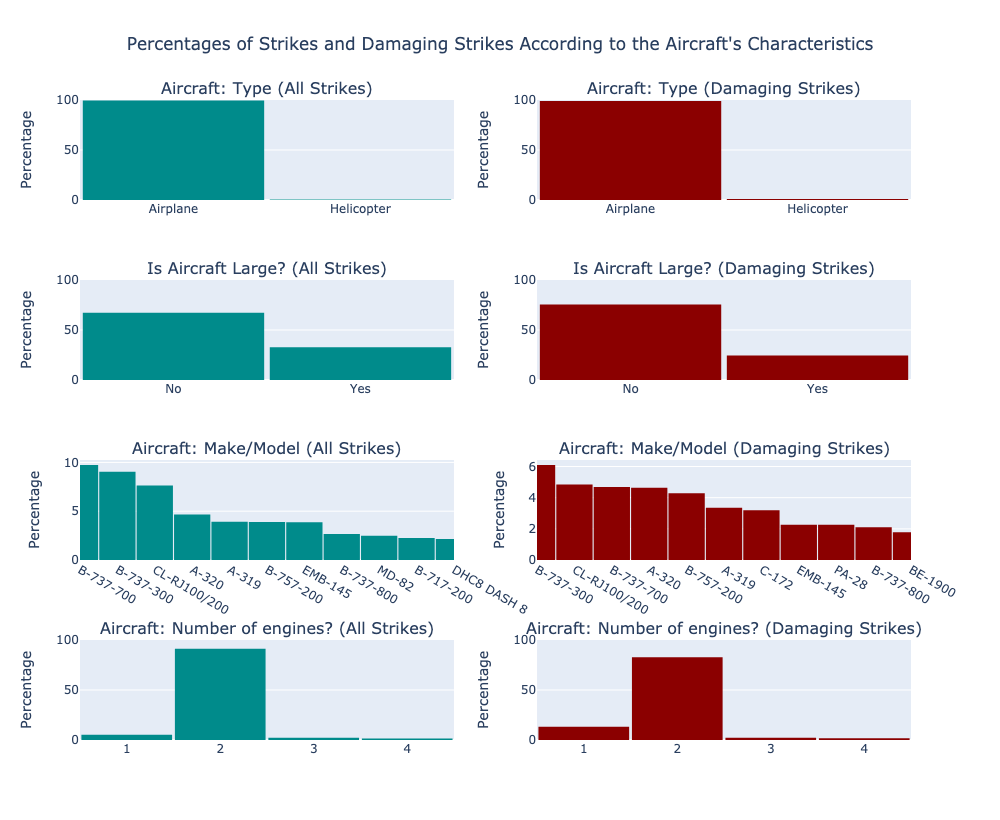

In [24]:
# Aircraft Columns

# Create Subplots Figure
fig = make_subplots(rows=4, cols=2, subplot_titles=("Aircraft: Type (All Strikes)", "Aircraft: Type (Damaging Strikes)", 
                                    "Is Aircraft Large? (All Strikes)", "Is Aircraft Large? (Damaging Strikes)",
                                    "Aircraft: Make/Model (All Strikes)", "Aircraft: Make/Model (Damaging Strikes)", 
                                    "Aircraft: Number of engines? (All Strikes)","Aircraft: Number of engines? (Damaging Strikes)"))


# Create the graph objects
graph1 = go.Histogram(x = df["Aircraft: Type"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph2 = go.Histogram(x = df_damage["Aircraft: Type"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph3 = go.Histogram(x = df["Is Aircraft Large?"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph4 = go.Histogram(x = df_damage["Is Aircraft Large?"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph5 = go.Histogram(x = df["Aircraft: Make/Model"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph6 = go.Histogram(x = df_damage["Aircraft: Make/Model"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph7 = go.Histogram(x = df["Aircraft: Number of engines?"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph8 = go.Histogram(x = df_damage["Aircraft: Number of engines?"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")

# Add the graph objects to the slots in the subplot grid
fig.append_trace(graph1, row = 1, col = 1)
fig.append_trace(graph2, row = 1, col = 2)
fig.append_trace(graph3, row = 2, col = 1)
fig.append_trace(graph4, row = 2, col = 2)
fig.append_trace(graph5, row = 3, col = 1)
fig.append_trace(graph6, row = 3, col = 2)
fig.append_trace(graph7, row = 4, col = 1)
fig.append_trace(graph8, row = 4, col = 2)

# Update yaxis properties
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 2)
fig.update_yaxes(title_text = "Percentage", row = 3, col = 1)
fig.update_yaxes(title_text = "Percentage", row = 3, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 2)

# Update xaxis properties
fig.update_xaxes(categoryorder='total descending', row = 1, col = 1)
fig.update_xaxes(categoryorder='total descending', row = 1, col = 2)
fig.update_xaxes(categoryorder='total descending', row = 2, col = 1)
fig.update_xaxes(categoryorder='total descending', row = 2, col = 2)
fig.update_xaxes(categoryorder='total descending', range = [0, 10], row = 3, col = 1)
fig.update_xaxes(categoryorder='total descending', range = [0, 10], row = 3, col = 2)
fig.update_xaxes(categoryorder='total descending', row = 4, col = 1)
fig.update_xaxes(categoryorder='total descending', row = 4, col = 2)

# Update the layout and show
fig.update_layout(height=900, width=1000, title_text="Percentages of Strikes and Damaging Strikes According to the Aircraft's Characteristics", 
                  title_x=0.5, showlegend = False, bargap=0.03)

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 820, width = 1000)
# fig.show()

From the figure above we can see that almost 100% of the strikes involve airplanes instead of helicopters.
<br>
<br>
Small aircrafts represent 67.1% of the incidents but are involved in 75.6% of the damaging strikes.
<br>
<br>
The most frequent models of aircrafts are B-737, CL-RJ100/200, and A-320/319. Together, these airplanes are involved in around 35% of the incidents.
<br>
<br>
91.1% of the accidents involve aircrafts with 2 engines. In addition, although single-engine airplanes are related with only 5.1% of the strikes, they represent 13.2% of the damaging accidents. 

In [25]:
# Building Crosstabs for the Damage Rate Plots

# Is Aircraft Large Crosstab
crosstab_large = pd.DataFrame(pd.crosstab(df["Is Aircraft Large?"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Aircraft Type Crosstab
crosstab_type = pd.DataFrame(pd.crosstab(df["Aircraft: Type"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Aircraft Make/Model Crosstab
crosstab_model = pd.DataFrame(pd.crosstab(df["Aircraft: Make/Model"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()
crosstab_model = crosstab_model.sort_values(by = "Caused damage", ascending = False).head(50)
# Aircraft Number of Engines Crosstab
crosstab_engines = pd.DataFrame(pd.crosstab(df["Aircraft: Number of engines?"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

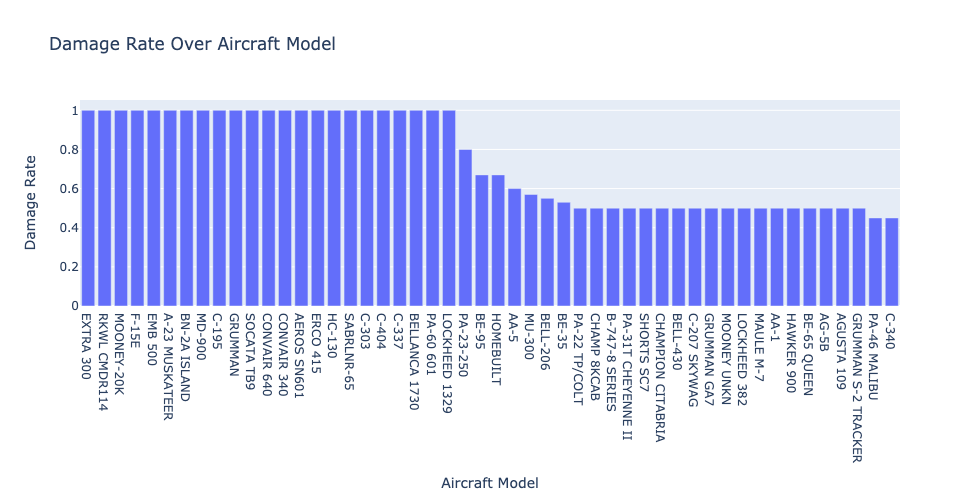

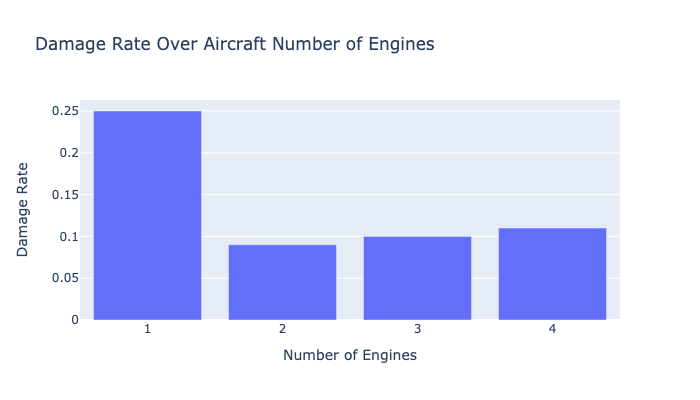

In [26]:
# "Is Aircraft Large?" Plot
fig1 = px.bar(x = crosstab_large["Is Aircraft Large?"], y = round(crosstab_large["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': '"Is Aircraft Large?"','y': 'Damage Rate'}, title = "Damage Rate Over Size of Aircraft")

# "Aircraft: Make/Model" Plot
fig2 = px.bar(x = crosstab_model["Aircraft: Make/Model"], y = round(crosstab_model["Caused damage"], 2),
              width = 980, height = 400, labels = {'x': 'Aircraft Model','y': 'Damage Rate'}, title = "Damage Rate Over Aircraft Model")

# "Aircraft: Number of engines?" Plot
fig3 = px.bar(x = crosstab_engines["Aircraft: Number of engines?"], y = round(crosstab_engines["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Number of Engines','y': 'Damage Rate'}, title = "Damage Rate Over Aircraft Number of Engines")

# For an interactive version of the plot, comment out the next lines of code and remove the comment from fig.show()
fig1.show(renderer = "png", height = 400, width = 700)
fig2.show(renderer = "png", height = 500, width = 980)
fig3.show(renderer = "png", height = 400, width = 700)
# fig.show()

The damage rate in small aircrafts is 11%, compared to 7% in larger ones.
<br>
<br>
In addition, bird strikes cause damage to single-engine aircrafts 25% of the time. Together, these two results suggest the size of the aircraft (i.e. small single-engine airplanes) may be more likely associated with damaging outcomes.
<br>
<br>
Next, let's explore the characteristics of the flights.

### Percentages of Strikes, Damaging Strikes and Damage Rate According to the Flight's Characteristics

In [27]:
# Flight Columns

# Create Subplots Figure
fig = make_subplots(rows = 4, cols = 2, subplot_titles = ("Altitude bin (All Strikes)", "Altitude bin (Damaging Strikes)", 
                                                          "When: Phase of flight (All Strikes)", "When: Phase of flight (Damaging Strikes)",
                                                          "Conditions: Precipitation (All Strikes)", "Conditions: Precipitation (Damaging Strikes)",
                                                          "Conditions: Sky (All Strikes)", "Conditions: Sky (Damaging Strikes)"))


# Create the graph objects
graph1 = go.Histogram(x = df["Altitude bin"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph2 = go.Histogram(x = df_damage["Altitude bin"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph3 = go.Histogram(x = df["When: Phase of flight"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph4 = go.Histogram(x = df_damage["When: Phase of flight"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph5 = go.Histogram(x = df["Conditions: Precipitation"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph6 = go.Histogram(x = df_damage["Conditions: Precipitation"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph7 = go.Histogram(x = df["Conditions: Sky"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph8 = go.Histogram(x = df_damage["Conditions: Sky"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")

# Add the graph objects to the slots in the subplot grid
fig.append_trace(graph1, row = 1, col = 1)
fig.append_trace(graph2, row = 1, col = 2)
fig.append_trace(graph3, row = 2, col = 1)
fig.append_trace(graph4, row = 2, col = 2)
fig.append_trace(graph5, row = 3, col = 1)
fig.append_trace(graph6, row = 3, col = 2)
fig.append_trace(graph7, row = 4, col = 1)
fig.append_trace(graph8, row = 4, col = 2)

# Update yaxis properties
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 2, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 3, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 3, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 2)

# Update xaxis properties
fig.update_xaxes(categoryorder = 'total descending', row = 1, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 1, col = 2)
fig.update_xaxes(categoryorder = 'total descending', row = 2, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 2, col = 2)
fig.update_xaxes(categoryorder = 'total descending', row = 3, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 3, col = 2)
fig.update_xaxes(categoryorder = 'total descending', row = 4, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 4, col = 2)

# Update the layout and show
fig.update_layout(height = 900, width = 1000, title_text = "Percentages of Strikes and Damaging Strikes According to the Flight's Characteristics", 
                  showlegend = False)

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 820, width = 1000)
# fig.show()

Although high-altitude strikes (i.e. > 1000 feet) occur only 19.1% of the time - which indicates that the majority happen at low altitudes - they represent 30.5% of the damaging incidents.
<br>
<br>
The majority of the total strikes and damaging strikes occur during the approach (40.8% and 40.3%, respectively). The next phase of the flight with the highest percentage of damaging incidents is during the climb (28.1%).
<br>
<br>
Most strikes occur during periods with no precipitation and no clouds.

In [28]:
# Building Crosstabs for the Damage Rate Plots

# Altitude Bin Crosstab
crosstab_altitude = pd.DataFrame(pd.crosstab(df["Altitude bin"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# When: Phase of flight Crosstab
crosstab_phase = pd.DataFrame(pd.crosstab(df["When: Phase of flight"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Conditions: Precipitation Crosstab
crosstab_precipitation = pd.DataFrame(pd.crosstab(df["Conditions: Precipitation"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Conditions: Sky Crosstab
crosstab_sky = pd.DataFrame(pd.crosstab(df["Conditions: Sky"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

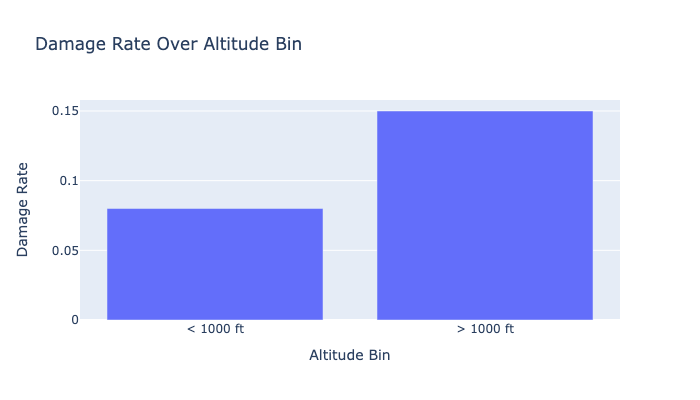

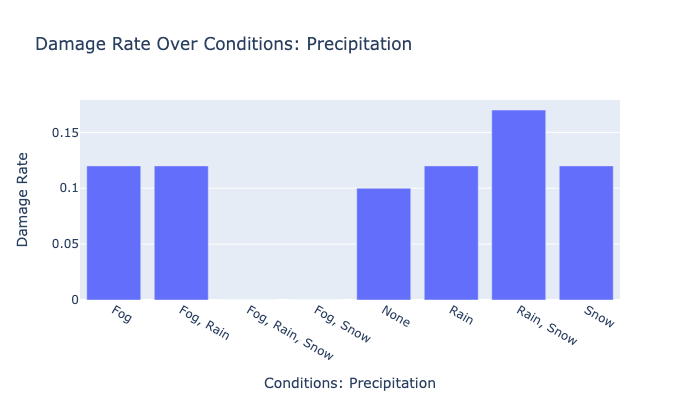

In [29]:
# "Altitude bin" Damage Rate Plot
fig1 = px.bar(x = crosstab_altitude["Altitude bin"], y = round(crosstab_altitude["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Altitude Bin','y': 'Damage Rate'}, title = "Damage Rate Over Altitude Bin")

# "When: Phase of flight" Damage Rate Plot
fig2 = px.bar(x= crosstab_phase["When: Phase of flight"], y = round(crosstab_phase["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': "Phase of Flight",'y': 'Damage Rate'}, title = "Damage Rate Over Phase of Flight")

# "Conditions: Precipitation" Damage Plot
fig3 = px.bar(x = crosstab_precipitation["Conditions: Precipitation"], y = round(crosstab_precipitation["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Conditions: Precipitation','y': 'Damage Rate'}, title = "Damage Rate Over Conditions: Precipitation")

# "Conditions: Sky" Damage Plot
fig4 = px.bar(x = crosstab_sky["Conditions: Sky"], y = round(crosstab_sky["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Conditions: Sky','y': 'Damage Rate'}, title = "Damage Rate Over Conditions: Sky")

# For an interactive version of the plot, comment out the next lines of code and remove the comment from fig.show()
fig1.show(renderer = "png", height = 400, width = 700)
fig2.show(renderer = "png", height = 400, width = 700)
fig3.show(renderer = "png", height = 400, width = 700)
fig4.show(renderer = "png", height = 400, width = 700)
# fig.show()

Looking at the figure above, we can see that the damage rate is twice as high at high altitudes compared to low altitudes (15% versus 8%, respectively). In addition, the most critical phases of the flight seem to be during the descent and climb, with damage rates of 20% and 16%, respectively.
<br>
<br>
Although the damage rate seems to be higher during snow and rain conditions (17%), no other clear relationship with meteorological conditions is highlighted.
<br>
<br>
Next, the characteristics of the birds are presented.

### Percentages of Strikes, Damaging Strikes and Damage Rate According to the Bird's Characteristics

In [30]:
# Bird Columns

# Create Subplots Figure
fig = make_subplots(rows = 4, cols = 2, subplot_titles = ("Wildlife: Size (All Strikes)", "Wildlife: Size (Damaging Strikes)",
                                                          "Wildlife: Species (All Strikes)", "Wildlife: Species (Damaging Strikes)",
                                                          "Wildlife: Number struck (All Strikes)","Wildlife: Number struck (Damaging Strikes)",
                                                          "Pilot warned of birds or wildlife? (All Strikes)", "Pilot warned of birds or wildlife? (Damaging Strikes)"))


# Create the graph objects
graph1 = go.Histogram(x = df["Wildlife: Size"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph2 = go.Histogram(x = df_damage["Wildlife: Size"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph3 = go.Histogram(x = df["Wildlife: Species"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph4 = go.Histogram(x = df_damage["Wildlife: Species"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph5 = go.Histogram(x = df["Wildlife: Number struck"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph6 = go.Histogram(x = df_damage["Wildlife: Number struck"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph7 = go.Histogram(x = df["Pilot warned of birds or wildlife?"], histnorm = "percent", marker = dict(color = 'darkcyan'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")
graph8 = go.Histogram(x = df_damage["Pilot warned of birds or wildlife?"], histnorm = "percent", marker = dict(color = 'darkred'),
                     hovertemplate = "%{x}: %{y:.2f}%<br>")

# Add the graph objects to the slots in the subplot grid
fig.append_trace(graph1, row = 1, col = 1)
fig.append_trace(graph2, row = 1, col = 2)
fig.append_trace(graph3, row = 2, col = 1)
fig.append_trace(graph4, row = 2, col = 2)
fig.append_trace(graph5, row = 3, col = 1)
fig.append_trace(graph6, row = 3, col = 2)
fig.append_trace(graph7, row = 4, col = 1)
fig.append_trace(graph8, row = 4, col = 2)

# Update yaxis properties
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 1, col = 2)
fig.update_yaxes(title_text = "Percentage", row = 2, col = 1)
fig.update_yaxes(title_text = "Percentage", row = 2, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 3, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 3, col = 2)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 1)
fig.update_yaxes(title_text = "Percentage", range = [0, 100], row = 4, col = 2)


# Update xaxis properties
fig.update_xaxes(categoryorder = 'total descending', row = 1, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 1, col = 2)
fig.update_xaxes(categoryorder = 'total descending', range = [0, 10], row = 2, col = 1)
fig.update_xaxes(categoryorder = 'total descending', range = [0, 10], row = 2, col = 2)
fig.update_xaxes(categoryorder = 'total descending', row = 3, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 3, col = 2)
fig.update_xaxes(categoryorder = 'total descending', row = 4, col = 1)
fig.update_xaxes(categoryorder = 'total descending', row = 4, col = 2)

# Update the layout and show
fig.update_layout(height = 900, width = 1000, title_text = "Percentages of Strikes and Damaging Strikes According to the Birds' Characteristics", 
                  title_x=0.5, showlegend = False)

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 820, width = 1000)
# fig.show()

The figure above notably shows that although large animals are involved in only 8.2% of the total strikes, they represent around 25% of the damaging accidents.
<br>
<br>
In addition, the majority of the birds' species are never identified. From the identified species, however, Canada geese represent almost 10% of the damaging strikes.
<br>
<br>
More than 90% of both total and damaging accidents involve a single animal or a small group.
<br>
<br>
Damage to the aircraft occurs 62.4% of the time when the pilot is not warned of birds nearby, compared to only 37.6% of the time when he is. This suggests that preventive systems could be an effective way of mitigating future accidents.

In [31]:
# Building Crosstabs for the Damage Rate Plots

# Is Aircraft Large Crosstab
crosstab_wildsize = pd.DataFrame(pd.crosstab(df["Wildlife: Size"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Aircraft Type Crosstab
crosstab_species = pd.DataFrame(pd.crosstab(df["Wildlife: Species"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()
crosstab_species = crosstab_species.sort_values(by = "Caused damage", ascending = False).head(50)

# Aircraft Make/Model Crosstab
crosstab_wildn = pd.DataFrame(pd.crosstab(df["Wildlife: Number struck"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()

# Aircraft Number of Engines Crosstab
crosstab_warned = pd.DataFrame(pd.crosstab(df["Pilot warned of birds or wildlife?"], df["Effect: Indicated Damage"], margins = False, normalize = "index")).reset_index()



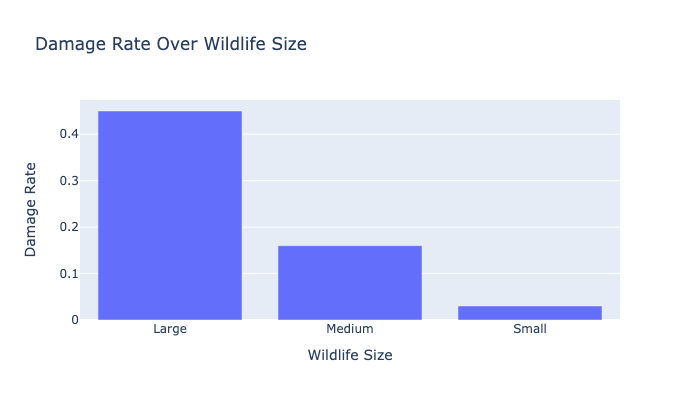

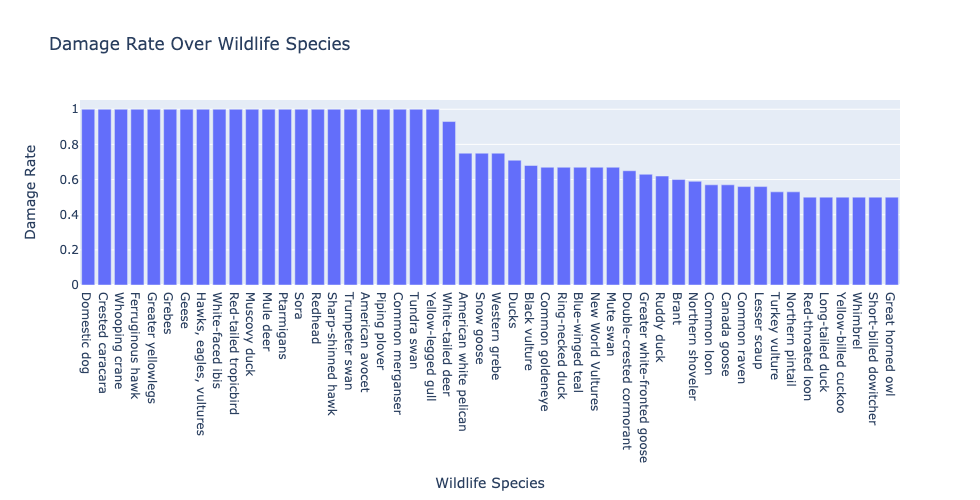

In [32]:
# "Wildlife: Size" Damage Rate Plot
fig1 = px.bar(x = crosstab_wildsize["Wildlife: Size"], y = round(crosstab_wildsize["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Wildlife Size','y': 'Damage Rate'}, title = "Damage Rate Over Wildlife Size")

# "Wildlife: Species" Damage Rate Plot
fig2 = px.bar(x= crosstab_species["Wildlife: Species"], y = round(crosstab_species["Caused damage"], 2),
              width = 980, height = 500, labels = {'x': 'Wildlife Species','y': 'Damage Rate'}, title = "Damage Rate Over Wildlife Species")

# "Wildlife: Number struck" Damage Plot
fig3 = px.bar(x = crosstab_wildn["Wildlife: Number struck"], y = round(crosstab_wildn["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Wildlife Number struck','y': 'Damage Rate'}, title = "Damage Rate Over Wildlife Number Struck")

# "Pilot warned of birds or wildlife?" Damage Plot
fig4 = px.bar(x = crosstab_warned["Pilot warned of birds or wildlife?"], y = round(crosstab_warned["Caused damage"], 2),
              width = 700, height = 400, labels = {'x': 'Pilot Warned','y': 'Damage Rate'}, title = "Damage Rate Over Pilot Warned")

# For an interactive version of the plot, comment out the next lines of code and remove the comment from fig.show()
fig1.show(renderer = "png", height = 400, width = 700)
fig2.show(renderer = "png", height = 500, width = 980)
fig3.show(renderer = "png", height = 400, width = 700)
fig4.show(renderer = "png", height = 400, width = 700)
# fig.show()

The figure above shows that incidents involving large animals have resulted in damage 45% of the time. Not surprisingly, the number of animals is also associated with a negative outcome, with a group size of over 100 animals having a damage rate of 50%, and a group size between 11 and 100 animals having a damage rate of 25%.

Next, the spatial analysis for the number of strikes by each US state is explored.

### Spatial Analysis: Location of Wildlife Strikes

The first step is to get the abbreviations of the US states in order to be able to create the interactive map in Plotly, as seen below.

In [33]:
# Creating a dictionay containing states names and abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [34]:
# Creating a dataframe with the number of strikes per state and year
df_count = df.groupby(['Origin State', 'Year'])['Record ID'].count().reset_index()

In [35]:
# Mapping the state codes to the dataframe
df_count['State Code'] = df_count['Origin State'].map(us_state_abbrev)
df_count

Origin State  Year  Record ID State Code
0        Alabama  2000         38         AL
1        Alabama  2001         19         AL
2        Alabama  2002         27         AL
3        Alabama  2003         19         AL
4        Alabama  2004         22         AL
..           ...   ...        ...        ...
675      Wyoming  2007          3         WY
676      Wyoming  2008          1         WY
677      Wyoming  2009          3         WY
678      Wyoming  2010          3         WY
679      Wyoming  2011          8         WY

[680 rows x 4 columns]

Next, the interactive plot is created. Please hover above the state to see the information about the number of strikes and the year. You can select a specific year in the bar below the plot or click play to start the animation.

In [36]:
# create a choropleth map with a slider for the year
fig = px.choropleth(
    data_frame=df_count,
    locations='State Code', 
    locationmode='USA-states',
    color='Record ID',
    animation_frame='Year',
    labels={'Year': 'Year', 'Record ID': 'Number of Strikes'},
    range_color=[df_count['Record ID'].min(), df_count['Record ID'].max()],
    scope ='usa',
    title ='Number of Strikes by US State Between 2000 and 2011'
)

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 600, width = 1000)
# fig.show()

The figure above shows that, historically, the state of Florida, Texas, and California are the ones with the highest number of strikes. Hypotheses for this fact include the higher number of flights in these states, paths to birds' migration routes, or a combination of both. In order to try to capture any pattern in the geographical features and bird migration routes between, the US states will be grouped according to the US Standard Federal Regions [4]. This step is performed during the label encoding section of this notebook.
<br>
<br>
We can also see a general increasing trend in the number of throughout the years. This temporal pattern is more deeply explored in the next section.

### Temporal Analysis  of Wildlife Strikes

Temporal analysis was performed by the quarters between 2000 and 2011. For this, a new column `Quarter` was created. 

In [37]:
# create a copy of the data to add the column representing the quarter of the year
df_quarter = df.copy()

In [38]:
# Create the column quarter
df_quarter['Quarter'] = df_quarter['FlightDate'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [39]:
df_quarter.groupby(['Quarter', 'Effect: Indicated Damage']).nunique().reset_index()

Quarter Effect: Indicated Damage  Record ID  Aircraft: Type  \
0   2000-Q1            Caused damage         47               1   
1   2000-Q1                No damage        135               1   
2   2000-Q2            Caused damage         48               2   
3   2000-Q2                No damage        291               1   
4   2000-Q3            Caused damage         45               1   
..      ...                      ...        ...             ...   
91  2011-Q2                No damage        696               2   
92  2011-Q3            Caused damage         65               2   
93  2011-Q3                No damage       1114               2   
94  2011-Q4            Caused damage         56               2   
95  2011-Q4                No damage        655               2   

    Airport: Name  Altitude bin  Aircraft: Make/Model  \
0              40             2                    39   
1              86             2                    51   
2              43             2                    33   
3             131             2                    78   
4              40             2                    35   
..            ...           ...                   ...   
91            214             2                    92   
92             58             2                    44   
93            277             2                   113   
94             44             2                    37   
95            213             2                    98   

    Wildlife: Number struck  Wildlife: Number Struck Actual  \
0                         3                              10   
1                         3                              11   
2                         3                               8   
3                         3                              13   
4                         3                               6   
..                      ...                             ...   
91                        3                              13   
92                        3                              11   
93                        3                              23   
94                        3                              10   
95                        3                              15   

    Effect: Impact to flight  FlightDate  Aircraft: Number of engines?  \
0                          4          35                             3   
1                          3          66                             4   
2                          5          41                             4   
3                          4          86                             4   
4                          5          37                             4   
..                       ...         ...                           ...   
91                         4          91                             4   
92                         5          47                             4   
93                         4          92                             4   
94                         5          41                             3   
95                         5          91                             4   

    Aircraft: Airline/Operator  Origin State  When: Phase of flight  \
0                           23            23                      5   
1                           35            37                      6   
2                           25            27                      5   
3                           55            46                      6   
4                           23            24                      5   
..                         ...           ...                    ...   
91                          65            55                      7   
92                          33            32                      6   
93                          81            54                      7   
94                          22            24                      5   
95                          64            51                      6   

    Conditions:

The figure below shows the quarterly pattern of the number of non-damaging (i.e. blue line) and damaging (i.e. red line) wildlife strikes. You can hover on a point to see the information of the number of strikes and the period. Also, you can draw a box around the damaging strikes in order to zoom in. 

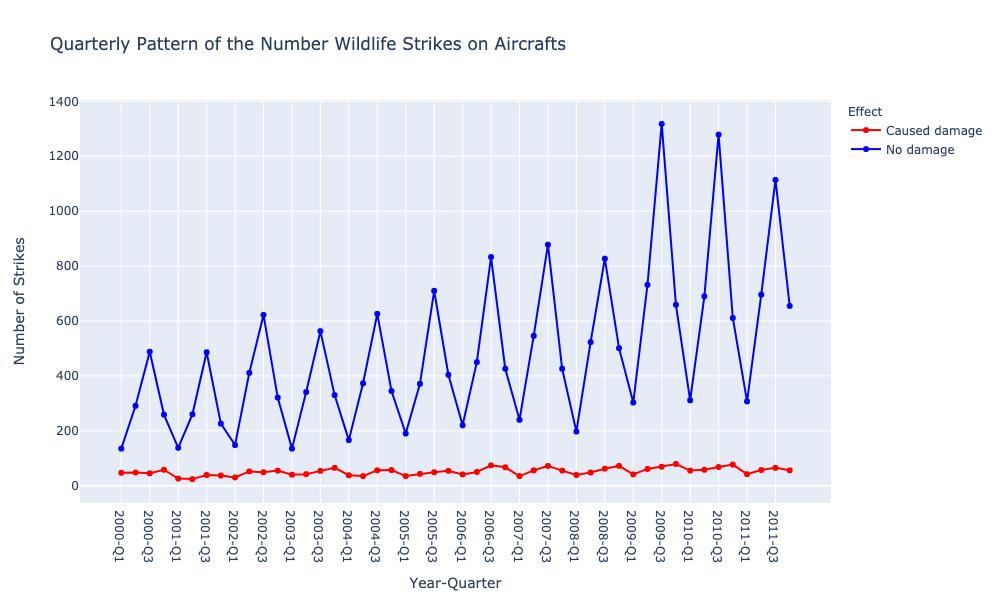

In [40]:
# line plot with data grouped by year-quarter and effect and aggregated using the count
fig = px.line(data_frame=df_quarter.groupby(['Quarter', 'Effect: Indicated Damage']).count().reset_index(),
        x='Quarter',
        y='Record ID',
        color= 'Effect: Indicated Damage',
        labels={'Record ID': 'Number of Strikes', 
                'Effect: Indicated Damage': 'Effect',
                'Quarter': 'Year-Quarter'},
        title='Quarterly Pattern of the Number Wildlife Strikes on Aircrafts',
        color_discrete_sequence=["red", "blue"])

fig.update_traces(mode='markers+lines')  

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 600, width = 1000)
# fig.show()

The first thing to notice from the image above is the seasonal trend in the number of strikes, with peaks around Q3 of every year. For damaging strikes, peaks also occur in Q3 of every year with occasional extensions through Q4. According to the FAA, about 53% of bird strikes occur from July to October which is when young birds recently have fledged from nests and fall migration occurs [1].
<br>
<br>
In addition, there is a general increase in the number of incidents from the year 2000 to 2011, possibly related to the general increase of the airline industry throughout the years [5].

Next, the temporal pattern of the damage rate is presented.

In [41]:
# Encoding 'Effect: Indicated Damage'
df_quarter.loc[:, 'Effect: Indicated Damage'] = np.where(df_quarter['Effect: Indicated Damage'] == "Caused damage", 1, 0)

In [42]:
# Calculate damage rate by quarter
quarter_damage_rate = df_quarter.groupby(['Quarter'])['Effect: Indicated Damage'].mean().reset_index()
quarter_damage_rate.head()

Quarter  Effect: Indicated Damage
0  2000-Q1                  0.258242
1  2000-Q2                  0.141593
2  2000-Q3                  0.084428
3  2000-Q4                  0.182965
4  2001-Q1                  0.158537

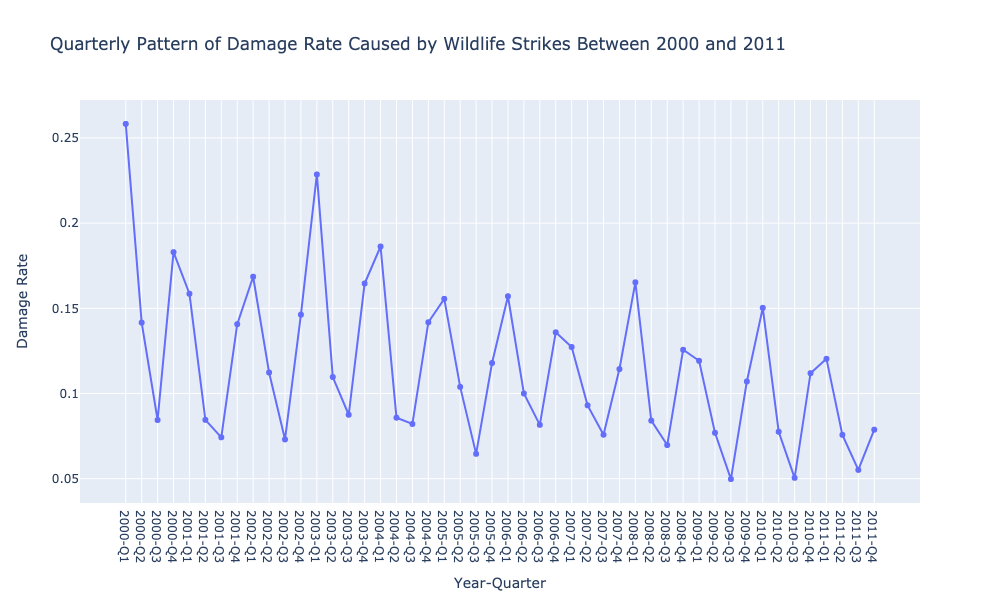

In [43]:
# line plot of damage rate with data grouped by year-quarter
fig = px.line(quarter_damage_rate,
        x='Quarter',
        y='Effect: Indicated Damage',
        labels={'Effect: Indicated Damage': 'Damage Rate',
                'Quarter': 'Year-Quarter'},
        title='Quarterly Pattern of Damage Rate Caused by Wildlife Strikes Between 2000 and 2011')

fig.update_traces(mode='markers+lines')  

# For an interactive version of the plot, comment out the next line of code and remove the comment from fig.show()
fig.show(renderer = "png", height = 600, width = 1000)
# fig.show()

Contrary to the number of strikes that peaks in Q3, the damage rate is higher Q1 of every year, with occasional double peaks that may also include Q4. Although not confirmed, possible hypotheses may include the migration of large birds during winter, or the effect of the cold weather on the structure of the aircraft in the winter months, which could potentially result in more damaging strikes compared to warmer months. 

---

#  Feature Selection

As previously mentioned, this project aims to better understand the causes of wildlife strikes and predict damaging incidents based on the characteristics of the aircrafts, birds, and flights. In other words, we are trying to predict which features better explain the values of the column `Effect: Indicated Damage`. 
<br>
<br>
For this reason, all information that was measured/collected after the strike is not in the causal path of `Effect: Indicated Damage` and cannot be used for predictions. Thus, these columns will not be retained for future analyses. This is the case of the columns `Remains of wildlife collected?`, `Remains of wildlife sent to Smithsonian`, `Remarks`, `Cost: Total $`, and `Number of people injured`.
<br>
<br>
In addition, `Wildlife: Number Struck Actual`, `Aircraft: Make/Model`, `Airport: Name`, and `Aircraft: Airline/Operator` contain information that exist, partially or completely, in other features. Thus, these columns will also not be retained.
<br>
<br>
The features included in the final dataset are shown below.

In [44]:
# Selecting the variables that will be used in the models
cleaned_df = df[['Aircraft: Type','Altitude bin', 'Wildlife: Number struck', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',  
       'Wildlife: Size', 'Conditions: Sky', 'Pilot warned of birds or wildlife?', 'Is Aircraft Large?',
       'Year', 'Month', 'Weekday']]

# Visualizing the data frame
cleaned_df.head()

Aircraft: Type Altitude bin Wildlife: Number struck  \
0       Airplane    > 1000 ft                Over 100   
1       Airplane    < 1000 ft                Over 100   
2       Airplane    < 1000 ft                Over 100   
3       Airplane    < 1000 ft                Over 100   
4       Airplane    < 1000 ft                Over 100   

  Effect: Indicated Damage Aircraft: Number of engines? Origin State  \
0            Caused damage                            2     New York   
1            Caused damage                            2        Texas   
2                No damage                            2    Louisiana   
3                No damage                            2   Washington   
4                No damage                            2     Virginia   

  When: Phase of flight Conditions: Precipitation Wildlife: Size  \
0                 Climb                      None         Medium   
1          Landing Roll                      None          Small   
2              Approach                      None          Small   
3                 Climb                      None          Small   
4              Approach                      None          Small   

  Conditions: Sky Pilot warned of birds or wildlife? Is Aircraft Large?  Year  \
0        No Cloud                                  N                Yes  2000   
1      Some Cloud                                  Y                 No  2001   
2        No Cloud                                  N                 No  2001   
3      Some Cloud                                  Y                Yes  2002   
4        No Cloud                                  N                 No  2003   

  Month Weekday  
0    11       4  
1    07       3  
2    09       5  
3    09       4  
4    06       1

---

# Encoding Categorical Variables

In this final step of the data cleaning/wrangling, we will encode the categorical variables since the machine learning algorithms used in Part 2 require data to be in numeric format. 

In [45]:
warnings.filterwarnings('ignore')

# Encoding 'Aircraft: Type'
cleaned_df.loc[:, 'Aircraft: Type'] = np.where(cleaned_df['Aircraft: Type'] == "Airplane", 1, 0)

In [46]:
# Encoding 'Altitude bin'
cleaned_df.loc[:, 'Altitude bin'] = np.where(cleaned_df['Altitude bin'] == "> 1000 ft", 1, 0)

In [47]:
# Encoding 'Effect: Indicated Damage'
cleaned_df.loc[:, 'Effect: Indicated Damage'] = np.where(cleaned_df['Effect: Indicated Damage'] == "Caused damage", 1, 0)

In [48]:
# Encoding 'Pilot warned of birds or wildlife?'
cleaned_df.loc[:, 'Pilot warned of birds or wildlife?'] = np.where(cleaned_df['Pilot warned of birds or wildlife?'] == "Y", 1, 0)

In [49]:
# Encoding 'Is Aircraft Large?'
cleaned_df.loc[:, 'Is Aircraft Large?'] = np.where(cleaned_df['Is Aircraft Large?'] == "Yes", 1, 0)

In [50]:
# Encoding 'Conditions: Precipitation'
cleaned_df.loc[:, 'Conditions: Precipitation'] = np.where(cleaned_df['Conditions: Precipitation'] == "None", 0, 1)

In [51]:
# Ranking the 'Wildlife: Number struck'
struck_map = {
    "1": 0,
    "2 to 10": 1,
    "11 to 100": 2,
    "Over 100": 3
}

# Label encoding 'Wildlife: Number struck' 
cleaned_df.loc[:, 'Wildlife: Number struck'] = cleaned_df['Wildlife: Number struck'].map(struck_map)

In [52]:
# Ranking the 'Wildlife: Size'
size_map = {
    "Small": 0,
    "Medium": 1,
    "Large": 2
}

# Label encoding 'Wildlife: Size'
cleaned_df.loc[:, 'Wildlife: Size'] = cleaned_df['Wildlife: Size'].map(size_map)

In [53]:
# Ranking the 'Conditions: Sky'
sky_map = {
    "No Cloud": 0,
    "Some Cloud": 1,
    "Overcast": 2
}

# Label encoding 'Wildlife: Size'
cleaned_df.loc[:, 'Conditions: Sky'] = cleaned_df['Conditions: Sky'].map(sky_map)

In [54]:
# Renaming 'When: Phase of flight' to 'flight_phase'
cleaned_df = cleaned_df.rename(columns={'When: Phase of flight': 'flight_phase'})

# Creating dummy variables for When:Phase of flight
phase_dummies = pd.get_dummies(cleaned_df[["flight_phase"]])

# Adding to the dataframe
cleaned_df = pd.concat([cleaned_df, phase_dummies], axis=1)

In [55]:
# Assigning a list of states to the respectives regions
Region_1 = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
Region_2 = ['New Jersey', 'New York', 'Puerto Rico', 'Virgin Islands']
Region_3 = ['Delaware', 'DC', 'Maryland', 'Pennsylvania', 'Virginia', 'West Virginia']
Region_4 = ['Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']
Region_5 = ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin']
Region_6 = ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas']
Region_7 = ['Iowa', 'Kansas', 'Missouri', 'Nebraska']
Region_8 = ['Colorado', 'Montana', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']
Region_9 = ['Arizona', 'California', 'Hawaii', 'Nevada', 'American Samoa', 'Guam', 'Northern Mariana Islands']
Region_10 = ['Alaska', 'Idaho', 'Oregon', 'Washington']
Canada = ['Alberta','British Columbia', 'Newfoundland and Labrador', 'Ontario', 'Quebec', 'Prince Edward Island', 'Saskatchewan']
International = ['International']

# Creating the dictionary
Region_1_dict = {i:"Region_1" for i in Region_1}
Region_2_dict = {i:"Region_2" for i in Region_2}
Region_3_dict = {i:"Region_3" for i in Region_3}
Region_4_dict = {i:"Region_4" for i in Region_4}
Region_5_dict = {i:"Region_5" for i in Region_5}
Region_6_dict = {i:"Region_6" for i in Region_6}
Region_7_dict = {i:"Region_7" for i in Region_7}
Region_8_dict = {i:"Region_8" for i in Region_8}
Region_9_dict = {i:"Region_9" for i in Region_9}
Region_10_dict = {i:"Region_10" for i in Region_10}
Canada_dict = {i:"Canada" for i in Canada}
International_dict = {i:"International" for i in International}

for region in [Region_2_dict, Region_3_dict, Region_4_dict, Region_5_dict, Region_6_dict, Region_7_dict, Region_8_dict, Region_9_dict, Region_10_dict, Canada_dict, International_dict]:
    Region_1_dict.update(region)
#d = {**Region_1_dict, **Region_2_dict, **Region_3_dict, **Region_4_dict, **Region_5_dict, **Region_6_dict, **Region_7_dict, **Region_8_dict, **Region_9_dict, **Region_10_dict, **Canada}
cleaned_df['Origin State'] = cleaned_df['Origin State'].map(Region_1_dict)

In [56]:
# Renaming 'Origin State' to 'regions'
cleaned_df = cleaned_df.rename(columns={'Origin State': 'regions'})

# Creating dummy variables for When:Phase of flight
regions_dummies = pd.get_dummies(cleaned_df[['regions']])

# Adding to the dataframe
cleaned_df = pd.concat([cleaned_df, regions_dummies], axis=1)

In [57]:
# Dropping 'regions' and 'flight_phase' after dummy variables added
cleaned_df.drop(columns=['regions','flight_phase'], inplace=True)

In [58]:
# Renaming columns to better describe the new information
cleaned_df = cleaned_df.rename(columns={'Aircraft: Type': 'is_airplane', 'Altitude bin' : 'is_more_1000ft', 'Wildlife: Number struck': 'number_struck',
                                      'Effect: Indicated Damage': 'is_damaged', 'Aircraft: Number of engines?' : 'number_engines',
                                      'Conditions: Precipitation': 'is_precipitation', 'Wildlife: Size': 'wildlife_size', 
                                      'Conditions: Sky' : 'conditions_sky', 'Pilot warned of birds or wildlife?': 'is_pilot_warned',
                                      'Is Aircraft Large?': 'is_aircraft_large'})

In [59]:
cleaned_df.head()

is_airplane  is_more_1000ft  number_struck  is_damaged number_engines  \
0            1               1              3           1              2   
1            1               0              3           1              2   
2            1               0              3           0              2   
3            1               0              3           0              2   
4            1               0              3           0              2   

   is_precipitation  wildlife_size  conditions_sky  is_pilot_warned  \
0                 0              1               0                0   
1                 0              0               1                1   
2                 0              0               0                0   
3                 0              0               1                1   
4                 0              0               0                0   

   is_aircraft_large  Year Month Weekday  flight_phase_Approach  \
0                  1  2000    11       4                      0   
1                  0  2001    07       3                      0   
2                  0  2001    09       5                      1   
3                  1  2002    09       4                      0   
4                  0  2003    06       1                      1   

   flight_phase_Climb  flight_phase_Descent  flight_phase_Landing Roll  \
0                   1                     0                          0   
1                   0                     0                          1   
2                   0                     0                          0   
3                   1                     0                          0   
4                   0                     0                          0   

   flight_phase_Parked  flight_phase_Take-off run  flight_phase_Taxi  \
0                    0                          0                  0   
1                    0                          0                  0   
2                    0                          0                  0   
3                    0                          0                  0   
4                    0                          0                  0   

   regions_Canada  regions_International  regions_Region_1  regions_Region_10  \
0               0                      0                 0                  0   
1               0                      0                 0                  0   
2               0                      0                 0                  0   
3               0                      0                 0                  1   
4               0                      0                 0                  0   

   regions_Region_2  regions_Region_3  regions_Region_4  regions_Region_5  \
0                 1                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 1                 0                 0   

   regions_Region_6  regions_Region_7  regions_Region_8  regions_Region_9  
0                 0                 0                 0                 0  
1                 1                 0                 0                 0  
2                 1                 0                 0                 0  
3                 0                 0                 0                 0  
4                 0                 0                 0                 0

In [60]:
# Checking the shape of the cleaned data frame
cleaned_df.shape

(25558, 32)

As seen in the table above, all columns are in numeric type. The final dataset will be saved and written back to the local machine in order to be loaded again in Part 2 of this project. 

In [61]:
# Saving the cleaned data frame as a csv file
cleaned_df.to_csv('data/cleaned_df.csv',index = False)

# Conclusion

These are the conclusions and recommendations following this initial analysis:

- Around 10% of all bird strikes result in damages to the aircraft. 
- Although the majority of strikes occur in aircrafts with 2 engines, small one-engine aircrafts are more likely to be damaged after a strike. Such aircrafts should be operated with caution in this regard.
- Most strikes involve small animals and a single specimen rather than a group. However, large birds and big flocks are more damaging once involved. It is advised that airports built near migration routes of medium to large-size birds implement surveillance measures in place.
- Bird strikes are more common during the approach and landing, while damaging strikes more frequently occur during the approach and climb phases. Bird tracking should be intensified and pilots should be informed better informed during these phases.
- California, Florida, and Texas are the US states with historically the higher number of strikes. More information on the bird migration routes, airport traffic, and bird control measures are necessary to understand the causes.
- Bird strikes have been increasing throughout the years. In addition, the number of total strikes and damaging strikes peaks in Q3 every year. The damage rate, however, is higher in Q4 and Q1. The effect of cold weather and the migration routes of large animals should be investigated as possible causes.

This concludes Part 1 of this project, which included data pre-processing and EDA. Please refer to Part 2 for the predictive models of damaging strikes.

# References

[1] Federal Aviation Administration. Wildlife Hazard Mitigation. https://www.faa.gov/airports/airport_safety/wildlife/faq/. Accessed on September 19, 2021.
<br>
[2] Federal Aviation Administration. FAA Wildlife Strike Database. https://wildlife.faa.gov/home. Accessed on September 19, 2021.
<br>
[3] data.world. 2000-2011 Birds Strikes Planes. https://data.world/shihzy/2000-2011-birds-strikes-planes. Accessed on August 10, 2021.
<br>
[4] Wikipedia. List of Regions of the United States. https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Standard_Federal_Regions. Accessed on September 19, 2021.
<br>
[5] Statista. Global air traffic - number of flights 2004-2021. https://www.statista.com/statistics/564769/airline-industry-number-of-flights/. Accessed on September 19, 2021.